In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rcParams

!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link = 'https://drive.google.com/file/d/1o9O-mPD5mfhgsLh60QqR-WVa2bPdTEsL/view?usp=sharing'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('train_and_test2.csv')

df = pd.read_csv('train_and_test2.csv')
DF_Titanic= pd.DataFrame(df)

EDA(Acá empieza el análisis exploratorio de los datos)


In [3]:
DF_Titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#FilasxColumnas
DF_Titanic.shape

(891, 12)

In [ ]:
DF_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
DF_Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Chequear si hay filas duplicadas
DF_Titanic.duplicated().sum()

0

In [7]:
#Ver cuantas veces se repite cada valor en la variable survived
DF_Titanic.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [13]:
#Ver cuantas mujeres sobrevivieron
DF_Mujeres=DF_Titanic.loc[ DF_Titanic['Sex'] == 'female']
#print(DF_Mujeres)
DF_Mujeres.Survived.value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [14]:
#Otro método para ver cuantas mujeres sobrevivieron

#Extraer la serie Survived de solo las mujeres
women = DF_Titanic.loc[DF_Titanic.Sex == 'female']["Survived"]

rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [15]:
#Ver cuantos hombres sobrevivieron
DF_Hombres=DF_Titanic.loc[ DF_Titanic.Sex == 'male']
DF_Hombres.Survived.value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

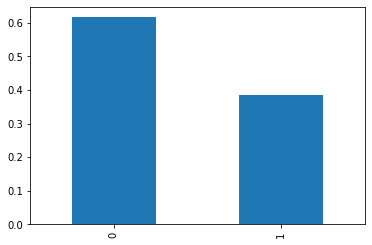

In [ ]:
#Ver cuantas veces se repite cada valor en la variable survived
DF_Titanic.Survived.value_counts(normalize=True).plot(kind="bar")

In [ ]:
#Estadisticas de la variable númerica age
DF_Titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

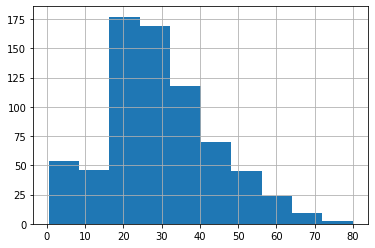

In [ ]:
DF_Titanic.Age.hist()

Estudio de relaciones entre las variables 

In [ ]:
sns.pairplot(DF_Titanic)

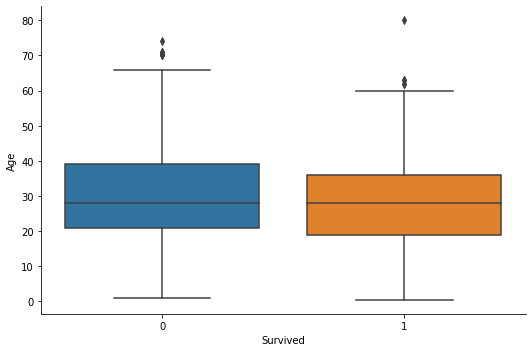

In [ ]:
sns.catplot(x="Survived", y="Age", data=DF_Titanic, kind="box", aspect=1.5)

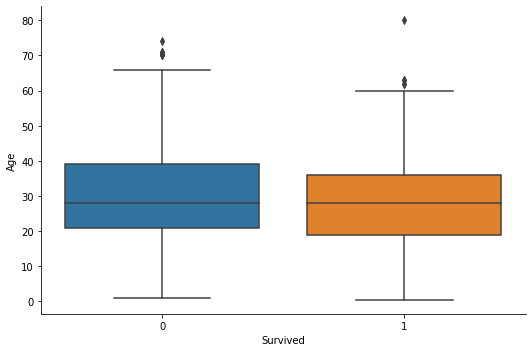

In [16]:
sns.catplot(x="Survived", y="Age", data=DF_Titanic, kind="box", aspect=1.5)

In [17]:
link = 'https://drive.google.com/file/d/1AYTMd--X9e-UwVP2Pr3j4ZBqlwzyvgyX/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('test.csv')

df = pd.read_csv('test.csv')
test_data= pd.DataFrame(df)

In [19]:
from sklearn.ensemble import RandomForestClassifier

y = DF_Titanic["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(DF_Titanic[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
from google.colab import files
files.download('submission.csv')
print("Your submission was successfully saved!")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Your submission was successfully saved!
